In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = []
data_files = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv']
for file in data_files:
    data = pd.read_csv("./data/" + file)
    train_data.append(data)

In [3]:
train_data = pd.concat(train_data)
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
content_data = train_data.drop(['COMMENT_ID','AUTHOR','DATE'], axis=1, inplace=False)

In [5]:
content_data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
import re

In [7]:
def keepOnlyChars(str):
    return " ".join(re.findall("[A-Za-z]+",str))

In [8]:
def removeHtmlTgs(str):
    return re.sub("<[^>]+>", "", str)

In [9]:
content_data["formatted"] = content_data["CONTENT"].apply(removeHtmlTgs)

In [10]:
content_data["formatted"] = content_data["formatted"].apply(keepOnlyChars)

In [11]:
content_data.head()

,CONTENT,CLASS,formatted
0,"Huh, anyway check out this you[tube] channel: ...",1,Huh anyway check out this you tube channel kob...
1,Hey guys check out my new channel and our firs...,1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test I have to say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtaRGgvGtWQ Check this out


In [12]:
final_data = content_data.drop(["CONTENT"], axis=1, inplace=False)

In [13]:
final_data.head()

,CLASS,formatted
0,1,Huh anyway check out this you tube channel kob...
1,1,Hey guys check out my new channel and our firs...
2,1,just for test I have to say murdev com
3,1,me shaking my sexy ass on my channel enjoy
4,1,watch v vtaRGgvGtWQ Check this out


In [14]:
final_data = final_data[["formatted","CLASS"]]

In [15]:
final_data.head()

,formatted,CLASS
0,Huh anyway check out this you tube channel kob...,1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev com,1
3,me shaking my sexy ass on my channel enjoy,1
4,watch v vtaRGgvGtWQ Check this out,1


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_data['formatted'],final_data['CLASS'],test_size=0.2,random_state=45)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)

In [20]:
x_test_counts = count_vect.transform(x_test)
x_test_counts

<392x3409 sparse matrix of type '<class 'numpy.int64'>'
	with 2360 stored elements in Compressed Sparse Row format>

In [21]:
x_test_tfidf = tranformer.transform(x_test_counts)
x_test_tfidf

<392x3409 sparse matrix of type '<class 'numpy.float64'>'
	with 2360 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tfidf,y_train)

LogisticRegression()

In [23]:
predictions = model.predict(x_test_tfidf)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       199
           1       0.95      0.94      0.94       193

    accuracy                           0.94       392
   macro avg       0.94      0.94      0.94       392
weighted avg       0.94      0.94      0.94       392



In [26]:
print(accuracy_score(y_test,predictions))

0.9438775510204082


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[189,  10],
       [ 12, 181]], dtype=int64)

<AxesSubplot:>

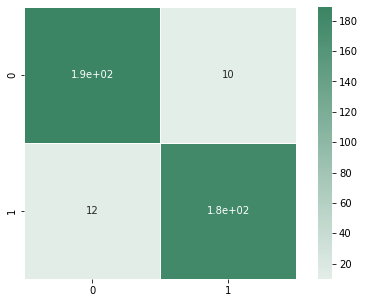

In [36]:
f, ax = plt.subplots(figsize = (8, 5))
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)

In [28]:
model2 = LogisticRegression(C = 2.0,max_iter = 200)
model2.fit(x_train_tfidf,y_train)

LogisticRegression(C=2.0, max_iter=200)

In [29]:
predictions2 = model2.predict(x_test_tfidf)

In [30]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       199
           1       0.94      0.94      0.94       193

    accuracy                           0.94       392
   macro avg       0.94      0.94      0.94       392
weighted avg       0.94      0.94      0.94       392



In [31]:
print(accuracy_score(y_test,predictions2))

0.9413265306122449


In [42]:
c_matrix2 = confusion_matrix(y_test, predictions2)
c_matrix2

array([[188,  11],
       [ 12, 181]], dtype=int64)

<AxesSubplot:>

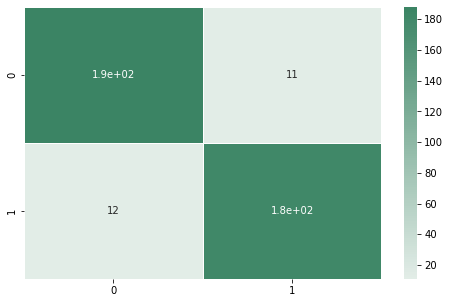

In [40]:
f, ax = plt.subplots(figsize = (8, 5))
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix2, center = 0, cmap=c_map, annot= True, square = True, linewidths= 0.5)